# UTD-MHAD Skeleton Normalization QA

Inspect raw vs normalized skeleton clips to verify centering/scale.

In [1]:
from pathlib import Path
import numpy as np
import random
import matplotlib.pyplot as plt
import yaml

DATA_ROOT = (Path.cwd() / '../datasets' / 'UTD_MHAD').resolve()
CONFIG_PATH = (Path.cwd() / '../conf' / 'data' / 'mhad.yaml').resolve()

assert DATA_ROOT.exists(), 'Missing dataset dir'
with CONFIG_PATH.open('r') as f:
    cfg = yaml.safe_load(f) or {}
TRAIN_SUBJECTS = cfg.get('train_subjects', [])
print('Train subjects:', TRAIN_SUBJECTS)

Train subjects: ['s1', 's2', 's3', 's4']


In [2]:
def collect_skeleton_pairs(subjects):
    pairs = []
    for subject in subjects:
        subj_dir = DATA_ROOT / subject
        if not subj_dir.is_dir():
            continue
        for raw_path in sorted(subj_dir.glob(f'a*_{subject}_t*_skeleton.npy')):
            norm_path = raw_path.with_name(raw_path.stem + '_norm.npy')
            if norm_path.exists():
                pairs.append((raw_path, norm_path))
    return pairs

subjects = TRAIN_SUBJECTS
pairs = collect_skeleton_pairs(subjects)
print(f'Collected {len(pairs)} skeleton pairs.')

Collected 335 skeleton pairs.


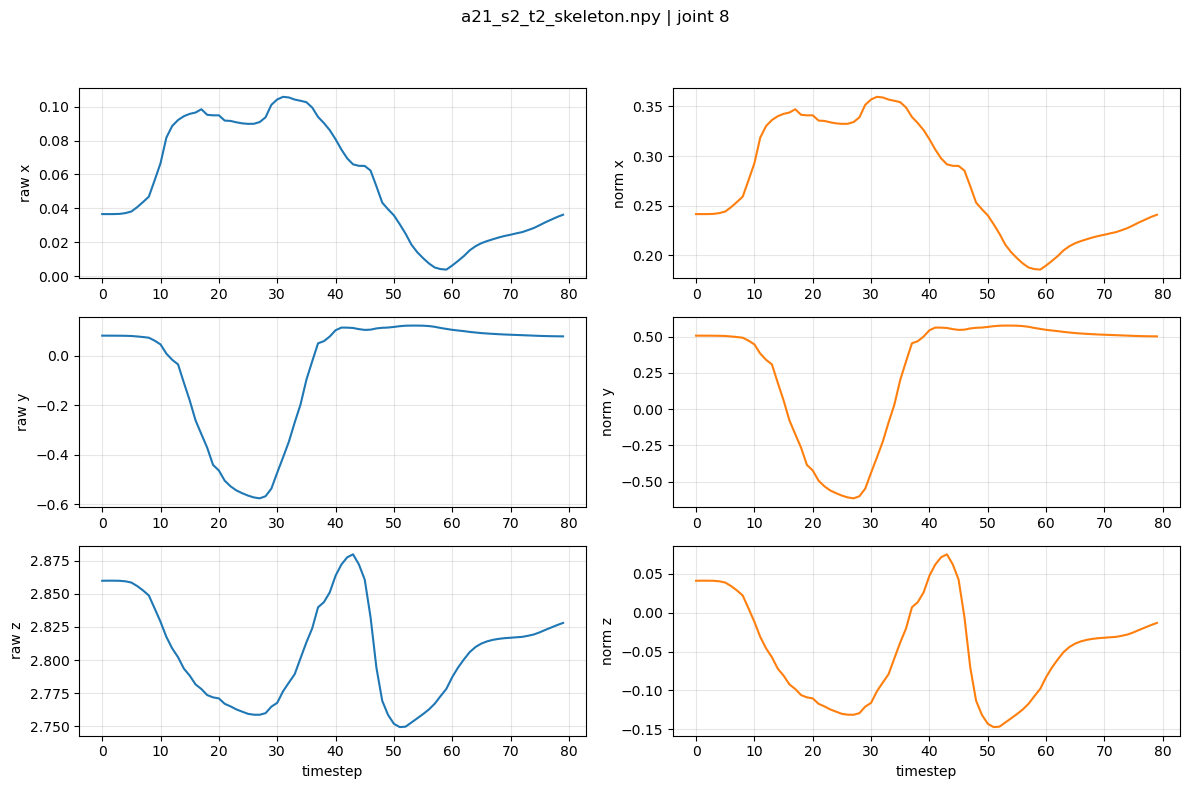

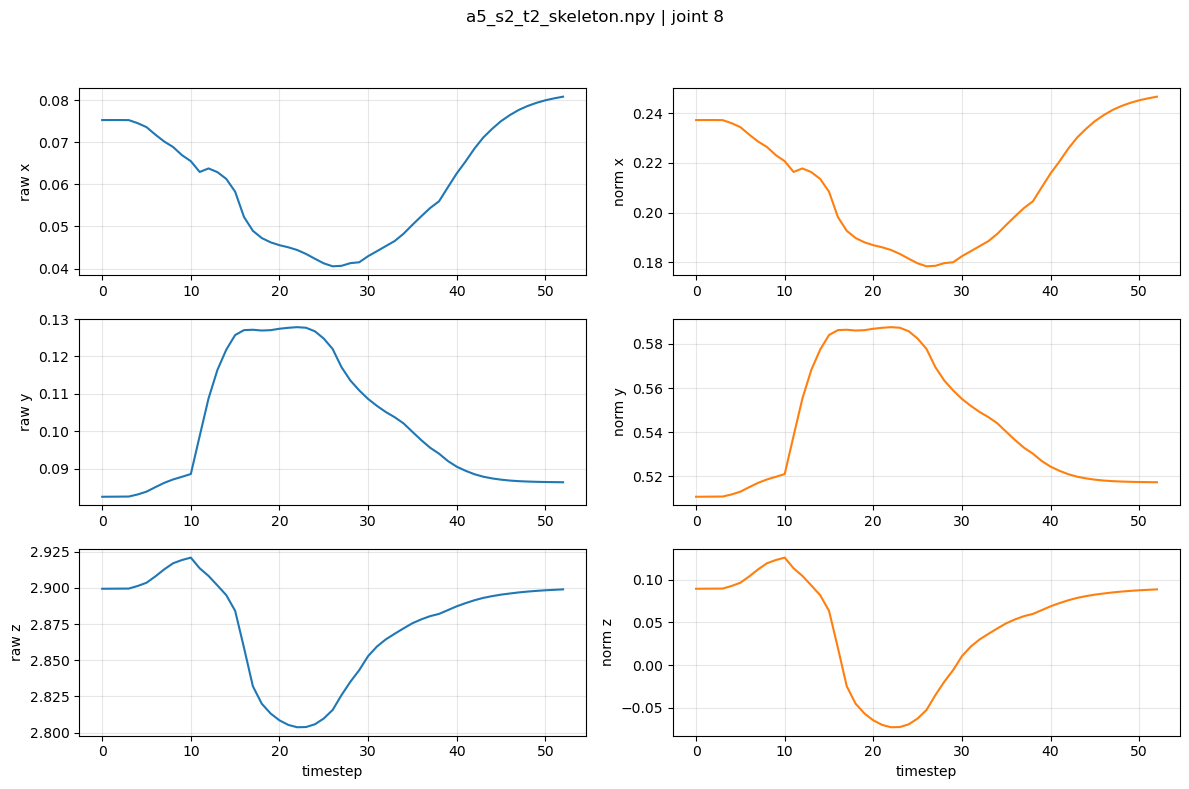

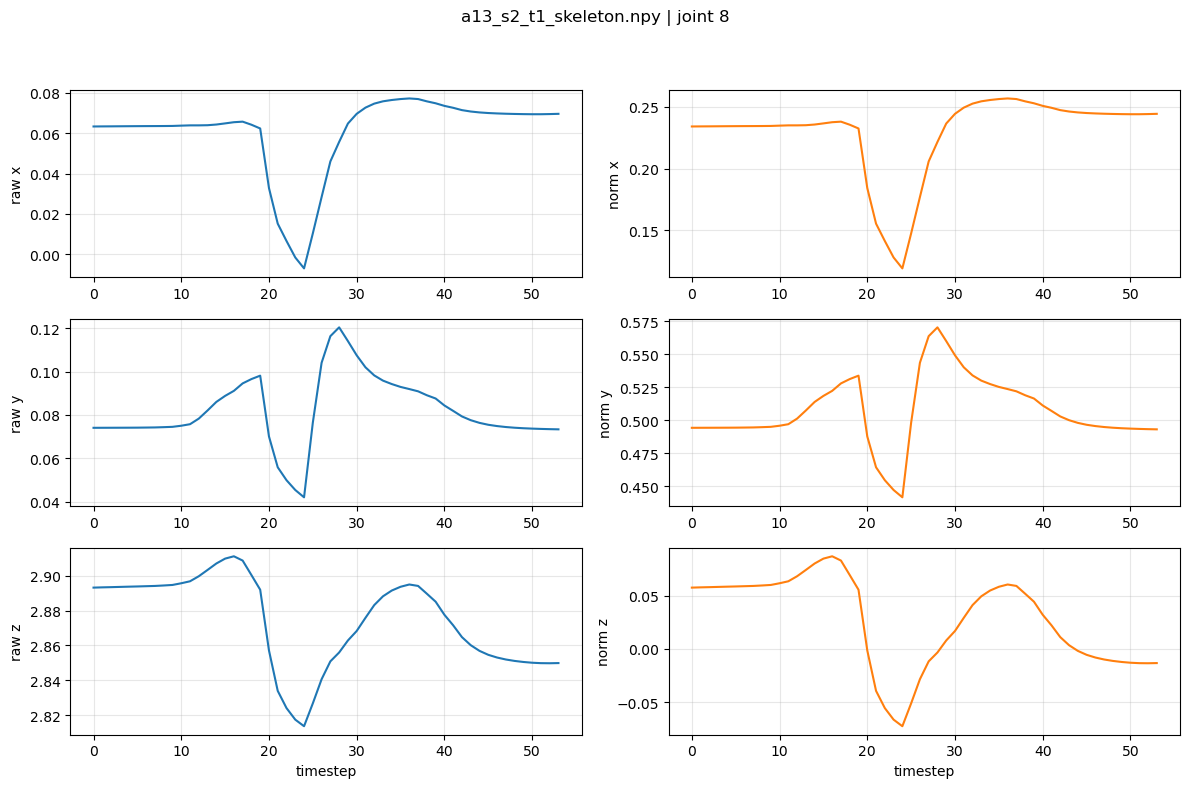

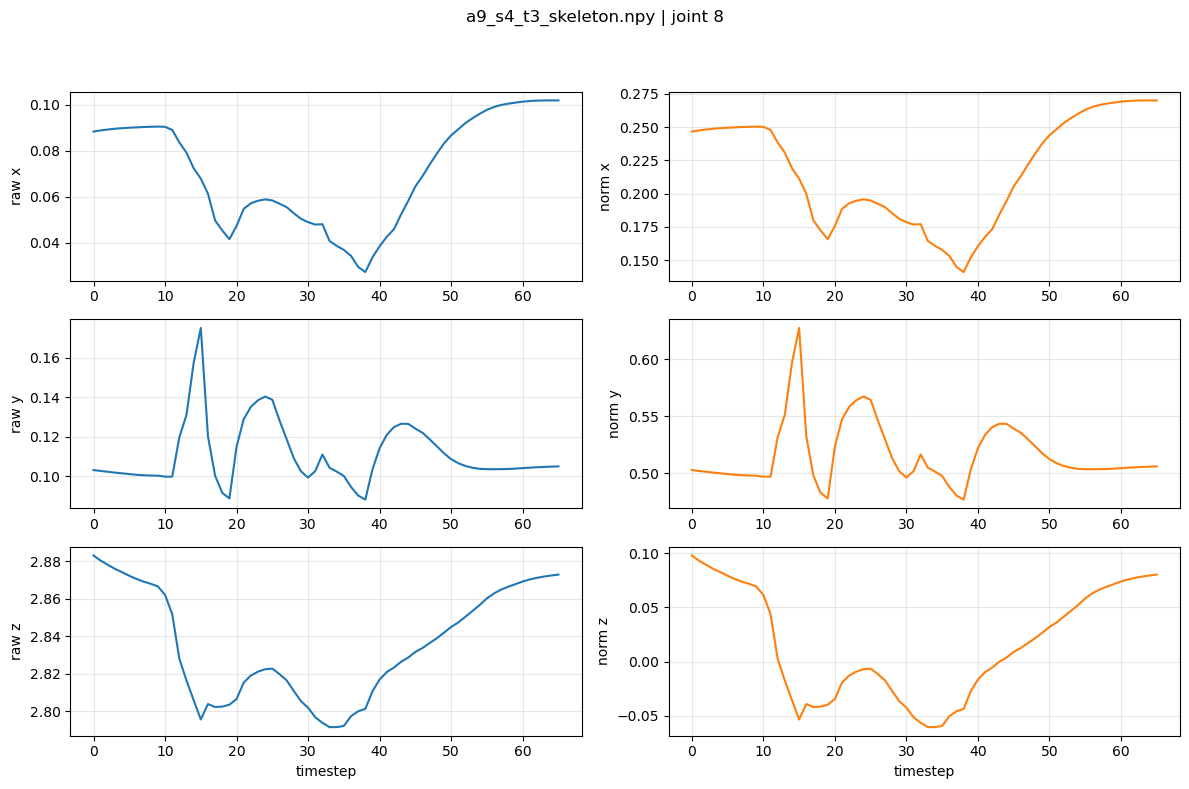

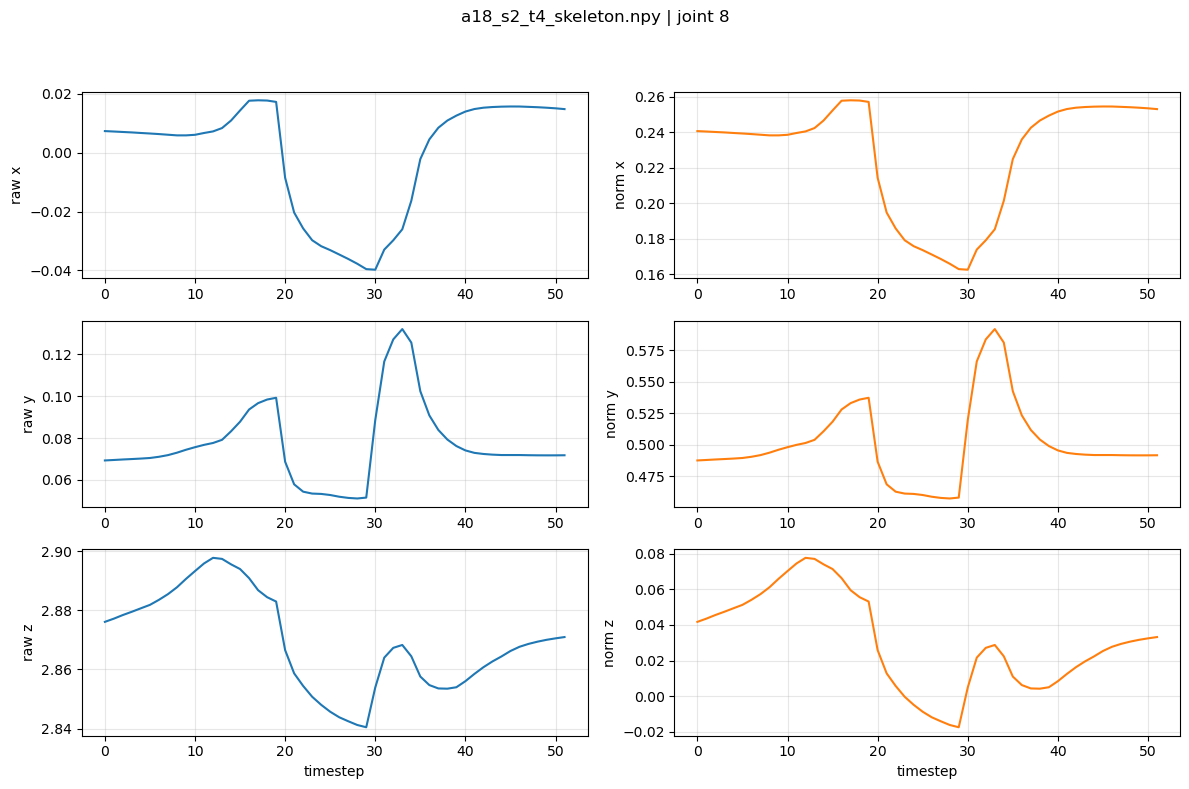

In [ ]:
def load_raw_skeleton(raw_path: Path) -> np.ndarray:
    arr = np.load(raw_path)
    if arr.shape[0] == 20 and arr.shape[1] == 3:
        arr = np.transpose(arr, (1, 0, 2))
    return arr


def load_norm_skeleton(norm_path: Path) -> np.ndarray:
    return np.load(norm_path)


def plot_skeleton_pair(raw_path: Path, norm_path: Path, joint_idx: int = 0):
    raw = load_raw_skeleton(raw_path)
    norm = load_norm_skeleton(norm_path)
    fig, axs = plt.subplots(3, 2, figsize=(12, 8))
    fig.suptitle(f'{raw_path.name} | joint {joint_idx}')
    axes_labels = ['x', 'y', 'z']
    for axis in range(3):
        axs[axis, 0].plot(raw[axis, joint_idx, :], color='tab:blue')
        axs[axis, 0].set_ylabel(f'raw {axes_labels[axis]}')
        axs[axis, 0].grid(True, alpha=0.3)
        axs[axis, 1].plot(norm[axis, joint_idx, :], color='tab:orange')
        axs[axis, 1].set_ylabel(f'norm {axes_labels[axis]}')
        axs[axis, 1].grid(True, alpha=0.3)
    axs[2, 0].set_xlabel('timestep')
    axs[2, 1].set_xlabel('timestep')
    plt.tight_layout(rect=[0, 0, 1, 0.94])
    plt.show()

random.seed(886)
num_samples = min(5, len(pairs))
for raw_path, norm_path in random.sample(pairs, num_samples):
    joint = 8
    plot_skeleton_pair(raw_path, norm_path, joint_idx=joint)